In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns
import json, os, pickle
from collections import defaultdict
import nupack
import sklearn
from scipy import stats


from tqdm import tqdm
import itertools

from nnn import util, fileio, mupack, plotting, modeling
import nnn.motif_fit as mf
import wandb

# suppress warnings 
import warnings
warnings.filterwarnings("ignore")

from nnn import train_nn as tnn

In [21]:
fixed_pclass = ['hairpin_size', 'interior_size', 'bulge_size', 'hairpin_triloop', 'hairpin_tetraloop', 'terminal_mismatch', 'stack']
config = dict(
    use_train_set_ratio = 1.,
    fit_method = 'svd',
    feature_method = 'get_nupack_feature_list',
    fit_intercept=False, 
    symmetry=False,
    fix_some_coef=True,
    fixed_pclass = fixed_pclass,
    test_mode = 'val', # {'val', 'test'}
    use_model_from = 'json', # {'lr_dict', 'json'}
    )

In [2]:
fixed_pclass = []#['hairpin_size', 'interior_size', 'bulge_size', 'hairpin_triloop', 'hairpin_tetraloop', 'terminal_mismatch', 'stack']
config = dict(
    use_train_set_ratio = 1.0,
    fit_method = 'svd',
    feature_method = 'get_feature_list',
    fit_intercept=False,
    stack_size=3,
    symmetry=False,
    sep_base_stack=True,
    fix_some_coef=True,
    fixed_pclass = fixed_pclass,
    test_mode = 'val', # {'val', 'test'}
    use_model_from = 'lr_dict', # {'lr_dict', 'json'}
    )

feats (27732, 1402) Index(['A+A+T+T_(+(+)+)', 'A+C+G+T_(+(+)+)', 'A+G+C+T_(+(+)+)'], dtype='object')
fixed_feature_names: []
Empty DataFrame
Columns: [dH]
Index: []
[]
Empty DataFrame
Columns: [dG]
Index: []
[]


Traceback (most recent call last):
  File "/Users/yuxi/workspace/nnn_paper/nnn/train_nn.py", line 20, in model_pipeline
    test(config, lr_dict=lr_dict)
  File "/Users/yuxi/workspace/nnn_paper/nnn/train_nn.py", line 270, in test
    metric_dict['all'] = dict(Tm=modeling.get_metric_dict(val_result_df, 'Tm'))
  File "/Users/yuxi/workspace/nnn_paper/nnn/modeling.py", line 209, in get_metric_dict
    metric['corr'] = util.pearson_r(y, y_pred)
  File "/Users/yuxi/workspace/nnn_paper/nnn/util.py", line 944, in pearson_r
    return pearsonr(y1, y2)[0]
  File "/Users/yuxi/opt/anaconda3/envs/nn_train/lib/python3.8/site-packages/scipy/stats/_stats_py.py", line 4411, in pearsonr
    raise ValueError('x and y must have length at least 2.')
ValueError: x and y must have length at least 2.


n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
n_feat,1402
n_fixed_feat,0
train_dG_mae,0.38139
train_dG_rsqr,0.8477
train_dH_mae,4.05238


ValueError: x and y must have length at least 2.

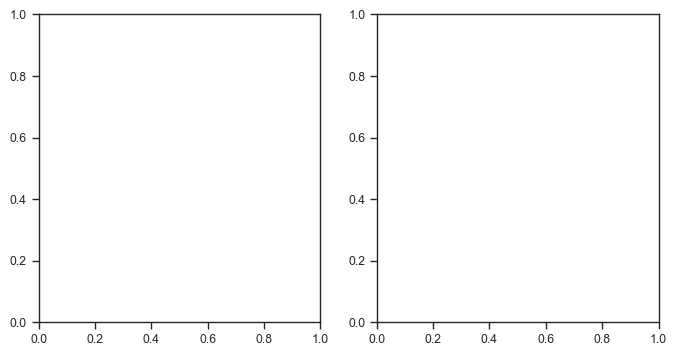

In [4]:
tnn.model_pipeline(config)

In [6]:
mydata = tnn.MyData()

In [ ]:
mf.get_feature_count_matrix(mydata.arr_1M, feature_method='get_')

In [3]:
myrange = np.arange(0.2, 1.2, .2)
myrange

array([0.2, 0.4, 0.6, 0.8, 1. ])

wandb: Currently logged in as: keyuxi. Use `wandb login --relogin` to force relogin


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


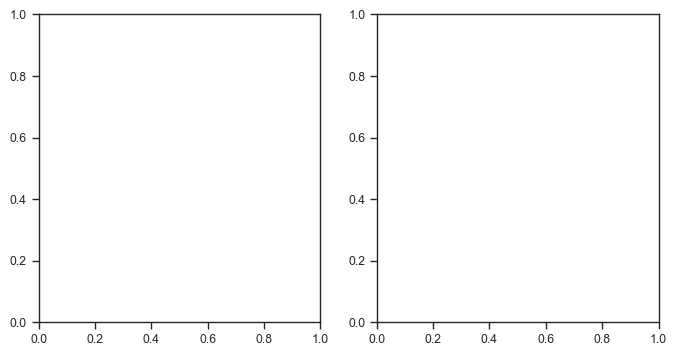

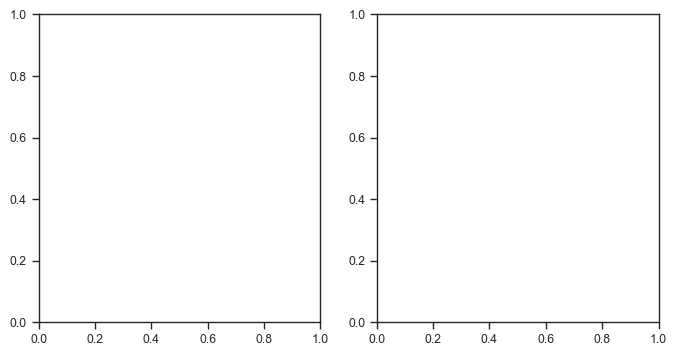

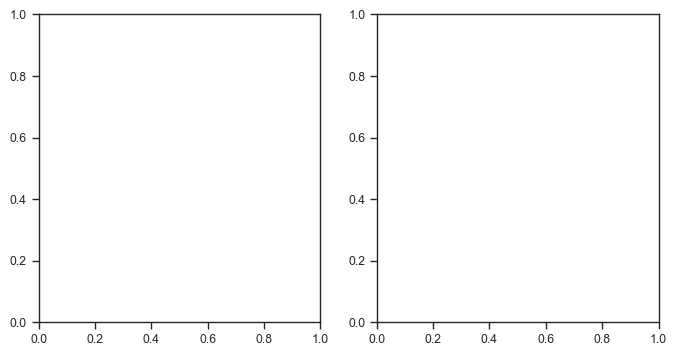

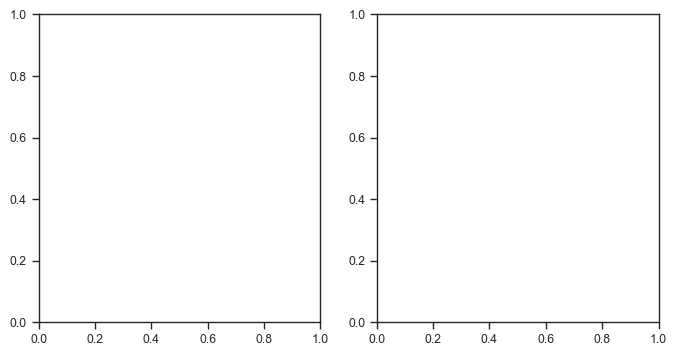

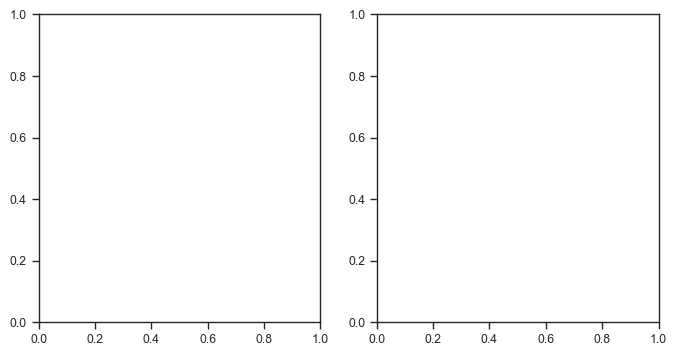

In [4]:
for ratio in myrange:
    config.update(dict(use_train_set_ratio=ratio))
    tnn.model_pipeline(config)

## Tests

In [70]:
mydata = tnn.MyData(config)
mydata.load_everything()

In [71]:
mydata.prepare_val_df()['lit_uv'].RefSeq[0][0]

'GATATAGCAAAATTCTAAGTTAATA'

In [49]:
# FUNCTION TEST
metric_dict = dict(
    all=dict(
        Tm=dict(rmse=.3),
    ),
    arr=dict(
        Tm=dict(rmse=.2),
        dH=dict(mae=.1),
        dG=dict(corr=.4)
    ),
    ov=dict(
        Tm=dict(rmse=.5)
    )
)
tnn.flatten_metric_dict(metric_dict)

{'val_Tm_rmse-all': 0.3,
 'val_Tm_rmse-arr': 0.2,
 'val_dH_mae-arr': 0.1,
 'val_dG_corr-arr': 0.4,
 'val_Tm_rmse-ov': 0.5}

In [23]:
json_file = './models/dna04.json'
tnn.test(config, json_file=json_file, debug=False, log_wandb=False,
         save_val_result_df=True, save_metric_json=True)

{'all': {'Tm': defaultdict(None,
              {'bias': 4.052530385047184,
               'corr': 0.7283678107929029,
               'rmse': 8.970813220600753,
               'adjusted_rmse': 8.003279785011552,
               'mae': 6.918323991138158,
               'adjusted_mae': 5.102455698416149})},
 'arr': {'Tm': defaultdict(None,
              {'bias': 2.460506006492743,
               'corr': 0.5926763545583157,
               'rmse': 11.514506934113333,
               'adjusted_rmse': 11.248545689455025,
               'mae': 8.613083415832527,
               'adjusted_mae': 8.257119862060655}),
  'dH': defaultdict(None,
              {'bias': -13.37753292190472,
               'corr': 0.3307041545308927,
               'rmse': 17.323838220109828,
               'adjusted_rmse': 11.007133305266,
               'mae': 14.511755225995635,
               'adjusted_mae': 9.202432714122292}),
  'dG': defaultdict(None,
              {'bias': -0.6273588099905687,
               'corr'

In [127]:
val_kwargs = dict(
    sodium = 'varied',
    model_kwargs={'DNA_conc': val_df['DNA_conc'].values}
)
seq_list, struct_list, sodium, model_kwargs = modeling.get_model_prediction(
                val_df,
                model='nupack', 
                model_param_file=json_file,
                **val_kwargs
            )

In [126]:
modeling.run_nupack(seq_list, struct_list, sodium, json_file, model_kwargs)

,dH,Tm,dG_37
0,NaN,56.388872,NaN
1,NaN,60.447325,NaN
2,NaN,57.092821,NaN
3,NaN,56.638673,NaN
4,NaN,58.732291,NaN


# Results

In [59]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("keyuxi/NN")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

# runs_df.to_csv("project.csv")

In [60]:
runs_df

,summary,config,name
0,"{'val_dG_bias-arr': 2.7917988408617327, 'val_T...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",chilling-mausoleum-46
1,"{'val_Tm_mae-lit_uv': 6.661954159766046, 'val_...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",ghostly-skeleton-45
2,"{'val_Tm_mae-arr': 208.51530143276193, 'val_dH...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",supernatural-warlock-44
3,"{'_wandb': {'runtime': 463}, '_runtime': 464.9...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",spooky-goblin-43
4,"{'train_dH_mae': 6.245854998043675, 'train_dH_...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",scary-treat-42
5,"{'val_Tm_rmse-lit_uv': 7.225930631707623, 'val...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",evil-sorcery-41
6,{'val_Tm_adjusted_rmse-lit_uv': 11.09348009030...,"{'symmetry': False, 'test_mode': 'val', 'fit_m...",enchanted-vampire-40
7,"{'n_fixed_feat': 0, 'train_dG_mae': 0.42332324...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",moonlit-mausoleum-39
8,"{'val_Tm_adjusted_mae-arr': 5.415205181640467,...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",moonlit-orb-38
9,"{'val_dH_mae-arr': 5.124491731488668, 'val_Tm_...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",enchanted-whisper-37


In [5]:
wandb_df = pd.read_csv('./data/wandb/wandb_export_2023-10-31T20_06_05.100-07_00.csv')

In [9]:
wandb_df.Tags

0             NaN
1     nupack_test
2     nupack_test
3             NaN
4     nupack_test
5             NaN
6     nupack_test
7     nupack_test
8     nupack_test
9             NaN
10    nupack_test
11    nupack_test
12            NaN
13    nupack_test
14    nupack_test
15            NaN
16            NaN
Name: Tags, dtype: object

In [11]:
query = 'Tags == "nupack_test"'
wandb_df.query(query)

,Name,State,Notes,Created,Tags,feature_method,fixed_pclass,sep_base_stack,use_model_from,use_train_set_ratio,...,val_dG_mae-arr,val_dG_rmse-arr,val_dH_adjusted_mae-arr,val_dH_adjusted_rmse-arr,val_dH_bias-arr,val_dH_corr-arr,val_dH_mae-arr,val_dH_rmse-arr,dG_intercept,dH_intercept
1,vague-mountain-52,finished,-,2023-11-01T02:52:27.000Z,nupack_test,get_nupack_feature_list,"[""hairpin_size"",""interior_size"",""bulge_size"",""...",NaN,json,1.0,...,2.791837,2.889194,6.360076,8.159551,18.652429,0.706253,18.669692,20.359061,NaN,NaN
2,ghostly-skeleton-45,finished,-,2023-10-31T23:11:13.000Z,nupack_test,get_nupack_feature_list,"[""hairpin_size"",""interior_size"",""bulge_size"",""...",NaN,json,0.9,...,2.694723,2.794994,6.356110,8.161822,18.479066,0.706509,18.502945,20.201268,NaN,NaN
4,logical-wood-51,finished,-,2023-11-01T02:44:15.000Z,nupack_test,get_nupack_feature_list,"[""hairpin_size"",""interior_size"",""bulge_size"",""...",NaN,json,0.8,...,2.838056,2.933225,6.404810,8.211418,19.086837,0.702890,19.102520,20.778227,NaN,NaN
6,supernatural-warlock-44,finished,-,2023-10-31T23:02:53.000Z,nupack_test,get_nupack_feature_list,"[""hairpin_size"",""interior_size"",""bulge_size"",""...",NaN,json,0.7,...,2.675603,2.778400,6.510224,8.354189,14.843033,0.695753,14.942734,17.032561,NaN,NaN
7,apricot-frost-50,finished,-,2023-11-01T02:36:02.000Z,nupack_test,get_nupack_feature_list,"[""hairpin_size"",""interior_size"",""bulge_size"",""...",NaN,json,0.6,...,2.739660,2.838544,6.381573,8.204774,17.026548,0.702182,17.058942,18.900308,NaN,NaN
8,spooky-goblin-43,finished,-,2023-10-31T22:55:03.000Z,nupack_test,get_nupack_feature_list,"[""hairpin_size"",""interior_size"",""bulge_size"",""...",NaN,json,0.5,...,2.732862,2.833166,6.494628,8.325717,16.097329,0.695749,16.151114,18.122957,NaN,NaN
10,likely-haze-49,finished,-,2023-11-01T02:28:01.000Z,nupack_test,get_nupack_feature_list,"[""hairpin_size"",""interior_size"",""bulge_size"",""...",NaN,json,0.4,...,2.554343,2.663783,6.589009,8.414485,18.687560,0.690740,18.714836,20.494595,NaN,NaN
11,scary-treat-42,finished,-,2023-10-31T22:47:07.000Z,nupack_test,get_nupack_feature_list,"[""hairpin_size"",""interior_size"",""bulge_size"",""...",NaN,json,0.3,...,2.928712,3.027609,6.385246,8.217143,13.524066,0.706417,13.696656,15.824721,NaN,NaN
13,eager-galaxy-48,finished,-,2023-11-01T02:20:05.000Z,nupack_test,get_nupack_feature_list,"[""hairpin_size"",""interior_size"",""bulge_size"",""...",NaN,json,0.2,...,2.154613,2.286846,6.793244,8.687698,20.131928,0.678357,20.153905,21.926482,NaN,NaN
14,evil-sorcery-41,finished,-,2023-10-31T22:39:20.000Z,nupack_test,get_nupack_feature_list,"[""hairpin_size"",""interior_size"",""bulge_size"",""...",NaN,json,0.1,...,0.907161,1.113955,6.446095,8.218293,2.396291,0.707993,6.467395,8.560523,NaN,NaN


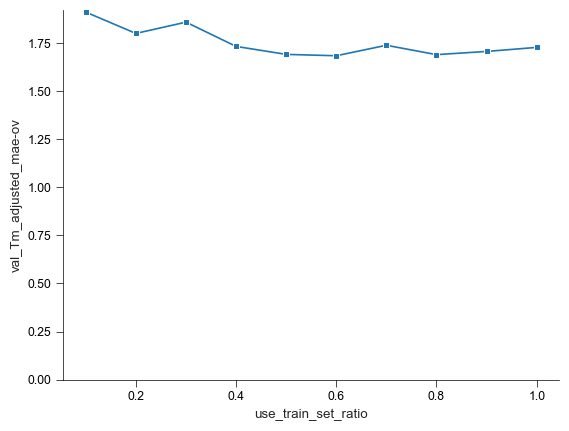

In [16]:
fig, ax = plt.subplots()
sns.lineplot(data=wandb_df.query(query), 
             x='use_train_set_ratio', y='val_Tm_adjusted_mae-ov',
            ax=ax, marker='s')
# ax.set_ylim(bottom=0, top=1)
ax.set_ylim(bottom=0)
plotting.beutify(ax)
util.save_fig('./fig/Fig4/mae.pdf')

In [19]:
from pprint import pprint

In [27]:
# import pandas as pd 
# import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("keyuxi/NNN_GNN")

summary_list, config_list, name_list, history_list = [], [], [], []
for run in runs:
    run_name_ind = int(run.name.split('-')[-1])

    if run_name_ind >= 242 and run_name_ind < 250:
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_dict = run.summary._json_dict
        
        keys_2_del = []
        for key in summary_dict:
            if key.startswith('_') or key.startswith('gradients') or key.startswith('parameters'):
                keys_2_del.append(key)

        summary_dict = {k:v for k,v in summary_dict.items() if not k in keys_2_del}
        summary_list.append(summary_dict)
    
        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
              if not k.startswith('_')})
    
        # .name is the human-readable name of the run.
        name_list.append(run.name)

        # History
        history_keys = ['Tm_corr_uv']
        history = run.scan_history(keys=history_keys)
        losses = [row["Tm_corr_uv"] for row in history]
        history_list.append(losses)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    }).set_index('name')

# runs_df.to_csv("project.csv")

In [28]:
pprint(runs_df.iloc[0].summary)

{'Tm_bias_lit_uv': 5.876175164183053,
 'Tm_bias_ov': 13.11461226787324,
 'Tm_corr_lit_uv': 0.77258619499824,
 'Tm_corr_ov': 0.48518971498848346,
 'Tm_corr_uv': 0.8519524312528577,
 'Tm_mae': 1.8019617497169071,
 'Tm_mae_adj_lit_uv': 5.378113375038822,
 'Tm_mae_adj_ov': 3.2548427118019996,
 'Tm_mae_lit_uv': 6.352240881980617,
 'Tm_mae_ov': 11.516890097226364,
 'Tm_mae_uv': 7.032573980658693,
 'Tm_rmse': 2.5217840455085057,
 'dG_37_mae': 0.18657584125077775,
 'dG_37_rmse': 0.2646356476518047,
 'dH_mae': 3.04044810647389,
 'dH_rmse': 4.18048307112973,
 'extra test results': {'_type': 'image-file',
                        'format': 'png',
                        'height': 300,
                        'path': 'media/images/extra test '
                                'results_294_60af26e654f94c5cd5a7.png',
                        'sha256': '60af26e654f94c5cd5a7ce7d10ca362390e22b419a20c67cccc9399b138aa9e6',
                        'size': 44754,
                        'width': 900},
 'fig':